# Preprocessing on full dataset (M1 + M2)


In [1]:
import scvelo as scv
import scanpy as sc
import os.path as op
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
# sys.path.insert(1, "/Users/smgroves/Documents/GitHub/Groves-CellSys2021/")
import mazebox as mb

In [2]:
# !pip install phate

## Read in Files

In [2]:
indir = "../../data/M1/"
sample = 'TKO_M1_SJSO3'

m1 = mb.pp.read_loom(sample, indir)

indir = "../../data/M2/"
sample = 'gex_possorted_bam_1WGCZ'

m2 = mb.pp.read_loom(sample, indir)
batch_categories = ["M1","M2"]
batch_key = 'sample'

adatas = [m1,m2] 

tfs = ['SP100', 'FOSL1', 'HES1', 'NFKBIZ', 'RELB', 'EPAS1', 'BCL3', 'REST', 'SP110', 'NFKB2', 'TEAD2', 'HMG20B', 'SIX5',
       'RARG', 'TEAD4', 'ZNF217', 'SP140L', 'SOX18', 'HOXC13', 'STAT6', 'ETV4', 'KLF2', 'MITF', 'NR0B2', 'ASCL1', 'ZBTB7C', 'ELF3',
       'RORC', 'FOXA2', 'ETS2','TOX3', 'XBP1', 'ST18', 'FOXA1', 'OVOL2', 'ZNF664', 'TBX10', 'PROX1', 'ETV6', 'CEBPD', 'TFCP2L1', 'FOXJ3',
       'ZNF407', 'ZNF511','ZNF396', 'RBPJ', 'ZSCAN31', 'HOXB5', 'ZNF3', 'TSHZ2', 'ZBTB16', 'ZNF10', 'FLI1', 'GATA4', 'NR0B1', 'NHLH1',
       'NEUROD6', 'ZNF581', 'TCF15', 'LYAR', 'ISL2', 'OLIG2', 'NEUROD1', 'INSM1', 'PAX5', 'SP6', 'MYT1', 'HES6', 'ZNF24', 'ISL1', 'ZNF397',
       'SOX11', 'ZNF253', 'SMAD4', 'RBP1', 'ONECUT2', 'ZNF711', 'DLX5', 'GRIP1', 'ZNF157', 'ZNF713', 'ZNF136', 'FOXN4', 'PATZ1', 'ZNF491',
       'ZBTB21', 'KLF12', 'ZNF501', 'ZNF785', 'CXXC1', 'ZNF324', 'ZNF764', 'ZBTB18', 'KAT8', 'ZNF334', 'POU4F1', 'ZNF250', 'ZNF132',
       'SALL2', 'DLX6', 'MBD1','SOX1', 'ZFP3', 'ZNF543', 'POU2F1', 'NONO', 'SMAD9', 'ZKSCAN2', 'TCF12', 'VEZF1', 'TOX', 'BHLHE22', 'MTA1',
       'TCF3', 'SCRT2', 'RFX7','NHLH2', 'SCRT1', 'RCOR2', 'PURG', 'TBPL1', 'TCF4', 'EBF1', 'ZNF749', 'NEUROD2', 'ZNF423', 'BACH2', 'GLI1',
       'ZFP64','NKX2-1', 'MYC', 'YAP1', 'POU2F3', 'MYCL', 'MYCN', 'ASCL2', 'AVIL', 'CHAT', 'GFI1B',
      'CHGA','EPCAM']

adata = mb.pp.dropkick_recipe(adatas, verbose=False, filter=False, batch_categories = batch_categories, batch_key = batch_key,
                                                X_final = 'log1p_norm',plot = False, n_hvgs=None,
                                                retain_genes=tfs)

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... storing 'Chromosome' as categorical
... storing 'Strand' as categorical
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... storing 'Chromosome' as categorical
... storing 'Strand' as categorical


Running dropkick on each sample and filtering...
Chosen lambda value:
	[0.0817149]
Assigning scores and labels
Done!

Chosen lambda value:
	[0.08775964]
Assigning scores and labels
Done!

AnnData object with n_obs × n_vars = 15502 × 32285
    obs: 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts', 'sample'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'dropkick_coef-M1', 'dropkick_coef-M2'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'
Filtering and normalizing concatenated data...
Filtered out 15566 genes that are detected 3 counts (spliced).
AnnData object with n_obs × n_vars = 10937 × 16719
    obs: 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts', 'sample', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'dropkick_coef-M1', 'dropkick_coef-M2'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced', 'raw_counts'
calculating cell cycle phase
-->    

In [3]:
adata

AnnData object with n_obs × n_vars = 10937 × 16719
    obs: 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts', 'sample', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ambient', 'log1p_total_counts_ambient', 'pct_counts_ambient', 'arcsinh_total_counts', 'S_score', 'G2M_score', 'phase'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'dropkick_coef-M1', 'dropkick_coef-M2', 'mito', 'pct_dropout_by_counts', 'ambient', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'total_counts', 'log1p_total_counts', 'mean', 'std'
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced', 'raw_counts', 'arcsinh_norm', 'log1p_norm'

In [4]:
adata.write_h5ad('../../data/combined/adata_01.h5ad')

... storing 'phase' as categorical


## PCA and UMAP

In [5]:
sc.tl.pca(adata, n_comps=50, use_highly_variable=False)
scv.pp.neighbors(adata, random_state=0)
scv.tl.umap(adata, random_state=0)

computing neighbors
    finished (0:00:09) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)


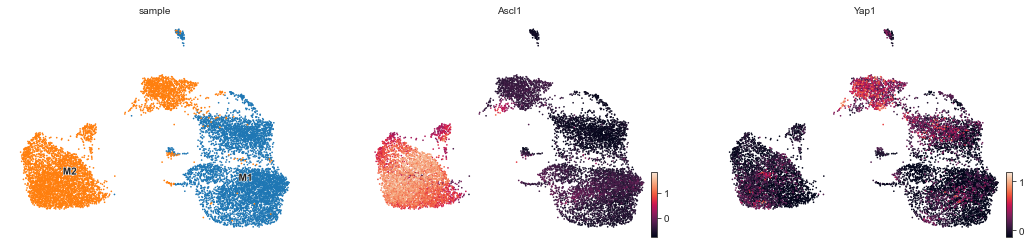

In [8]:
scv.pl.umap(adata, color = ['sample','Ascl1','Yap1'], smooth = True, legend_loc = 'on data')

In [20]:
adata.write_h5ad('../../data/combined/adata_01.h5ad')

... storing 'predicted_doublets' as categorical


# Batch Correction with Scanorama

In [9]:
import scanorama

## Correction

In [10]:
batches = sorted(adata.obs['sample'].cat.categories)

alldata = {}
for batch in batches:
    print(batch)
    alldata[batch] = adata[adata.obs['sample'] == batch,]

# convert to list of AnnData objects
adatas = list(alldata.values())
corrected = scanorama.correct_scanpy(adatas, return_dimred=True)
for i in corrected:
    print(i.obs['sample'][0])

M1
M2
Found 16719 genes among all datasets
[[0.         0.32991288]
 [0.         0.        ]]
Processing datasets (0, 1)
M1
M2


## Plot scanorama corrected data

In [11]:
first = corrected.pop(0)
adata_SC = first.concatenate(corrected, batch_key='sample',
                                            batch_categories=batches)

adata_SC.obs_names = [i.rsplit('-',1)[0] for i in adata_SC.obs_names]
adata.obsm['corrected'] = adata_SC[adata.obs_names,:].X
adata.obsm['X_scanorama'] = adata_SC[adata.obs_names,:].obsm['X_scanorama']

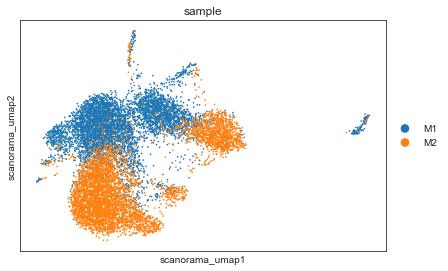

In [13]:
sc.pp.neighbors(adata, use_rep="X_scanorama", key_added='scanorama_neighbors')
tmp = sc.tl.umap(adata, neighbors_key='scanorama_neighbors', random_state=0, copy=True)
adata.obsm['X_scanorama_umap'] = tmp.obsm['X_umap']
del tmp
sc.pl.scatter(adata, basis='scanorama_umap',color='sample')

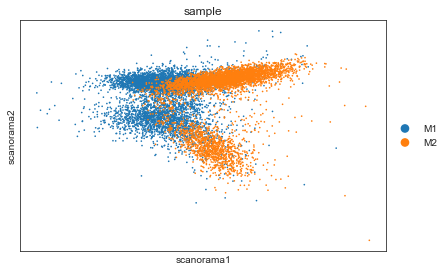

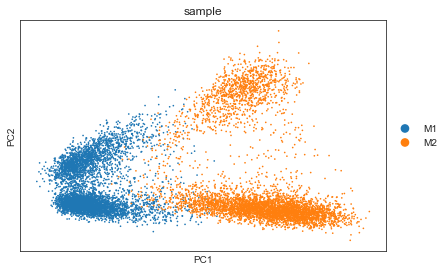

In [17]:
sc.pl.scatter(adata, basis='scanorama', color='sample')
sc.pl.scatter(adata, basis='pca', color='sample')


In [30]:
adata.write_h5ad('../../data/combined/adata_01.h5ad')

... storing 'brcd' as categorical


# Filtering to Debbie's data

## Add metadata to Anndata 

so we can see which cells match with Debbie's analysis. 


In [18]:
meta = pd.read_csv("../../metadata_final.csv", header = 0, index_col=0)

We'll count up how many cells are in M2, since the metadata file contains M1 and M2.

In [19]:
from collections import Counter

Counter([i.split('-')[1] for i in meta.index])

Counter({'1': 5060, '2': 4388})

In [77]:
new_index = []
for i in meta.index:
    s = i.split("-")
    n = s[0]+"-M"+s[1]
    new_index.append(n)
    

In [80]:
meta.index = new_index

In [87]:
adata.obs['brcd'] = None

In [88]:
meta['brcd'] = 0

In [89]:
for x in meta.index:    
    for y in adata.obs.index:
        x_brcd = x #x.split('-')[0]
        y_brcd = y.split(':')[1][:-4]+"-" + y.split("-")[1]  
        if x_brcd == y_brcd:
            meta.loc[x,'brcd'] = x_brcd
            adata.obs.loc[y,'brcd'] = x_brcd


In [90]:
adata.obs

,dropkick_score,dropkick_label,arcsinh_n_genes_by_counts,sample,initial_size_spliced,initial_size_unspliced,initial_size,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,...,log1p_total_counts_mito,pct_counts_mito,total_counts_ambient,log1p_total_counts_ambient,pct_counts_ambient,arcsinh_total_counts,S_score,G2M_score,phase,brcd
CellID,,,,,,,,,,,,,,,,,,,,,
gex_possorted_bam_SJSO3:AAACCGGCAGCCTAACx-M1,0.190799,False,6.419998,M1,603,815,603.0,307,5.730100,603.0,...,0.0,0.0,258.0,5.556828,42.786072,7.095065,-0.121874,-0.119527,G1,AAACCGGCAGCCTAAC-M1
gex_possorted_bam_SJSO3:AAAGCCGCACCCACCTx-M1,0.270716,False,6.458341,M1,693,1079,693.0,319,5.768321,693.0,...,0.0,0.0,337.0,5.823046,48.629150,7.234178,-0.025292,-0.018342,G1,AAAGCCGCACCCACCT-M1
gex_possorted_bam_SJSO3:AAAGCACCAGGACACAx-M1,0.000000,False,5.337561,M1,309,249,309.0,104,4.653960,309.0,...,0.0,0.0,196.0,5.283204,63.430424,6.426491,-0.100009,-0.168765,G1,None
gex_possorted_bam_SJSO3:AAAGCGGGTACAAAGAx-M1,0.200445,False,5.976357,M1,448,686,448.0,197,5.288267,448.0,...,0.0,0.0,241.0,5.488938,53.794640,6.797942,-0.102866,0.030603,G2M,None
gex_possorted_bam_SJSO3:AAACGTACAGGACCAAx-M1,0.323707,False,6.100324,M1,487,551,487.0,223,5.411646,487.0,...,0.0,0.0,243.0,5.497168,49.897331,6.881413,-0.076383,-0.122249,G1,AAACGTACAGGACCAA-M1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gex_possorted_bam_1WGCZ:TTTGTTGGTCACTCGCx-M2,0.551957,True,7.495542,M2,1445,3483,1445.0,900,6.803505,1445.0,...,0.0,0.0,341.0,5.834811,23.598616,7.969012,0.062456,0.117224,G2M,None
gex_possorted_bam_1WGCZ:TTTGTGGCATGGCCCAx-M2,0.377218,False,7.213769,M2,957,1898,957.0,679,6.522093,957.0,...,0.0,0.0,138.0,4.934474,14.420062,7.556951,0.325519,0.057889,S,TTTGTGGCATGGCCCA-M2
gex_possorted_bam_1WGCZ:TTTGTGTTCGGCCATAx-M2,0.336164,False,7.054450,M2,785,4144,785.0,579,6.363028,785.0,...,0.0,0.0,80.0,4.394449,10.191083,7.358831,0.302878,0.034236,S,TTTGTGTTCGGCCATA-M2


In [91]:
meta

,orig.ident,nCount_RNA,nFeature_RNA,nCount_ATAC,nFeature_ATAC,nucleosome_signal,nucleosome_percentile,TSS.enrichment,TSS.percentile,barcode,...,NE_score1,identity,non.NE_score1,comb.score,S.Score,G2M.Score,Phase,old.ident,wsnn_res.0.5,brcd
AAACAGCCAAAGCGGC-M1,SeuratProject,845,282,7896,3864,0.681760,0.67,8.753409,0.80,AAACAGCCAAAGCGGC,...,-0.242737,NE_2,0.000000,-0.242737,0.039616,-0.037981,S,NE_2,2,0
AAACAGCCACAGGGAC-M2,SeuratProject,760,429,5214,2440,0.474255,0.03,9.331652,0.86,AAACAGCCACAGGGAC,...,0.939053,NE_3,-0.219722,1.158775,0.039616,-0.015865,S,NE_3,3,AAACAGCCACAGGGAC-M2
AAACAGCCACCTATAG-M1,SeuratProject,6922,2338,53518,21699,0.857939,0.97,5.769329,0.13,AAACAGCCACCTATAG,...,-0.354737,NE_1,-0.099396,-0.255340,0.149260,0.314904,G2M,NE_7,1,AAACAGCCACCTATAG-M1
AAACAGCCATAGACCC-M1,SeuratProject,3929,1433,21912,9778,0.584779,0.26,7.417687,0.52,AAACAGCCATAGACCC,...,-0.267384,NE_10,-0.171067,-0.096318,0.087035,-0.052885,S,NE_6,12,AAACAGCCATAGACCC-M1
AAACAGCCATGCATAT-M2,SeuratProject,1771,1091,11431,5175,0.630870,0.46,7.916915,0.65,AAACAGCCATGCATAT,...,0.518453,NE_1,-0.166355,0.684809,0.020608,0.007212,S,NE_1,1,AAACAGCCATGCATAT-M2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTTCCCGTTGT-M1,SeuratProject,1246,493,6472,3223,0.730294,0.81,6.216568,0.21,TTTGTGTTCCCGTTGT,...,-0.377275,NE_2,-0.166355,-0.210920,-0.026010,-0.014904,G1,NE_2,2,TTTGTGTTCCCGTTGT-M1
TTTGTGTTCCTTAGGG-M2,SeuratProject,792,526,15868,7329,0.677008,0.65,3.640634,0.01,TTTGTGTTCCTTAGGG,...,0.828149,NE_3,-0.043944,0.872094,-0.054622,0.012500,G2M,NE_3,3,TTTGTGTTCCTTAGGG-M2
TTTGTGTTCGGCCATA-M2,SeuratProject,4272,1860,5745,2730,0.523573,0.09,8.322113,0.73,TTTGTGTTCGGCCATA,...,-0.536215,NE_2,-0.210300,-0.325915,0.131853,-0.259135,S,NE_1,2,TTTGTGTTCGGCCATA-M2
TTTGTTGGTCAAAGAA-M2,SeuratProject,4382,2031,3182,1585,0.632890,0.47,7.829380,0.63,TTTGTTGGTCAAAGAA,...,0.143793,NE_4,-0.083178,0.226970,-0.217087,-0.194231,G1,NE_4,4,TTTGTTGGTCAAAGAA-M2


In [93]:
adata.obs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10937 entries, gex_possorted_bam_SJSO3:AAACCGGCAGCCTAACx-M1 to gex_possorted_bam_1WGCZ:TTTGTGAAGTAAACCCx-M2
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   dropkick_score              10937 non-null  float64 
 1   dropkick_label              10937 non-null  category
 2   arcsinh_n_genes_by_counts   10937 non-null  float64 
 3   sample                      10937 non-null  category
 4   initial_size_spliced        10937 non-null  uint64  
 5   initial_size_unspliced      10937 non-null  uint64  
 6   initial_size                10937 non-null  float32 
 7   n_genes_by_counts           10937 non-null  int32   
 8   log1p_n_genes_by_counts     10937 non-null  float64 
 9   total_counts                10937 non-null  float32 
 10  log1p_total_counts          10937 non-null  float32 
 11  total_counts_mito           10937 non-null  float64 
 1

In [94]:
new_adata_obs = adata.obs.merge(meta, how = 'left', on='brcd')


In [95]:
new_adata_obs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10937 entries, 0 to 10936
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   dropkick_score              10937 non-null  float64 
 1   dropkick_label              10937 non-null  category
 2   arcsinh_n_genes_by_counts   10937 non-null  float64 
 3   sample_x                    10937 non-null  category
 4   initial_size_spliced        10937 non-null  uint64  
 5   initial_size_unspliced      10937 non-null  uint64  
 6   initial_size                10937 non-null  float32 
 7   n_genes_by_counts           10937 non-null  int32   
 8   log1p_n_genes_by_counts     10937 non-null  float64 
 9   total_counts                10937 non-null  float32 
 10  log1p_total_counts          10937 non-null  float32 
 11  total_counts_mito           10937 non-null  float64 
 12  log1p_total_counts_mito     10937 non-null  float64 
 13  pct_counts_mito 

In [96]:
new_adata_obs.index = adata.obs.index

In [97]:
adata.obs = new_adata_obs

In [98]:
adata.obs

,dropkick_score,dropkick_label,arcsinh_n_genes_by_counts,sample_x,initial_size_spliced,initial_size_unspliced,initial_size,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,...,nFeature_gene_activity,NE_score1,identity,non.NE_score1,comb.score,S.Score,G2M.Score,Phase,old.ident,wsnn_res.0.5
CellID,,,,,,,,,,,,,,,,,,,,,
gex_possorted_bam_SJSO3:AAACCGGCAGCCTAACx-M1,0.190799,False,6.419998,M1,603,815,603.0,307,5.730100,603.0,...,6642.0,-0.534705,NE_1,-0.055452,-0.479253,-0.055022,-0.117308,G1,NE_5,1.0
gex_possorted_bam_SJSO3:AAAGCCGCACCCACCTx-M1,0.270716,False,6.458341,M1,693,1079,693.0,319,5.768321,693.0,...,7396.0,0.108774,NE_4,0.609970,-0.501196,-0.005602,-0.119231,G1,NE_5,4.0
gex_possorted_bam_SJSO3:AAAGCACCAGGACACAx-M1,0.000000,False,5.337561,M1,309,249,309.0,104,4.653960,309.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gex_possorted_bam_SJSO3:AAAGCGGGTACAAAGAx-M1,0.200445,False,5.976357,M1,448,686,448.0,197,5.288267,448.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gex_possorted_bam_SJSO3:AAACGTACAGGACCAAx-M1,0.323707,False,6.100324,M1,487,551,487.0,223,5.411646,487.0,...,4846.0,-0.553258,Club cells_1,-0.127122,-0.426136,0.007203,-0.111058,S,Club cells_1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gex_possorted_bam_1WGCZ:TTTGTTGGTCACTCGCx-M2,0.551957,True,7.495542,M2,1445,3483,1445.0,900,6.803505,1445.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gex_possorted_bam_1WGCZ:TTTGTGGCATGGCCCAx-M2,0.377218,False,7.213769,M2,957,1898,957.0,679,6.522093,957.0,...,3792.0,-0.606037,NE_2,-0.194081,-0.411956,-0.079232,-0.091346,G1,NE_2,2.0
gex_possorted_bam_1WGCZ:TTTGTGTTCGGCCATAx-M2,0.336164,False,7.054450,M2,785,4144,785.0,579,6.363028,785.0,...,2306.0,-0.536215,NE_2,-0.210300,-0.325915,0.131853,-0.259135,S,NE_1,2.0


In [100]:
adata

AnnData object with n_obs × n_vars = 10937 × 16719
    obs: 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts', 'sample_x', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ambient', 'log1p_total_counts_ambient', 'pct_counts_ambient', 'arcsinh_total_counts', 'S_score', 'G2M_score', 'phase', 'brcd', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'barcode', 'sample_y', 'ATAC_snn_res.0.5', 'seurat_clusters', 'nCount_peaks', 'nFeature_peaks', 'peaks_snn_res.0.5', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.5', 'SCT.weight', 'peaks.weight', 'nCount_Imputed_counts', 'nFeature_Imputed_counts', 'nCount_gene_activity', 'nFeature_gene_activity', 'NE_score1', 'identity', 'non.NE_

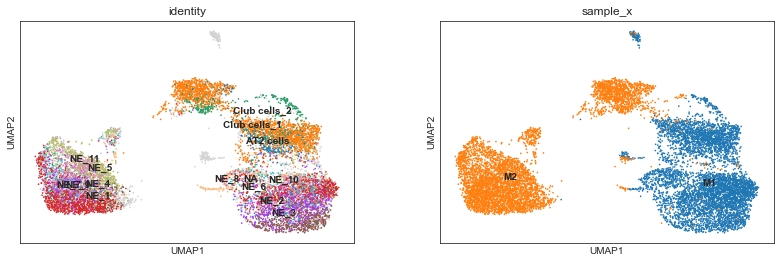

In [103]:
sc.pl.umap(adata, color = ['identity', 'sample_x'], legend_loc = 'on data')

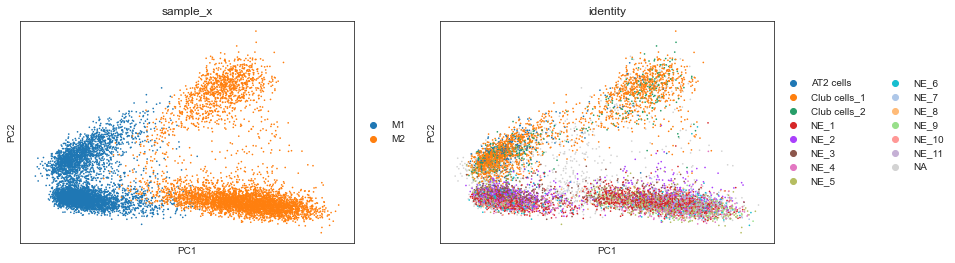

In [107]:
sc.pl.pca(adata, color = ['sample_x','identity'])

In [110]:
adata.write_h5ad('../../data/combined/adata_01.h5ad')

## Filter AnnData to Debbie's subset

In [108]:
adata.obs.identity.describe()

count             8908
unique              14
top       Club cells_1
freq              1949
Name: identity, dtype: object

This shows that my analysis from Notebook 1a had 5165 cells, whereas adding the information from Debbie's analysis gave info for 4388 cells. We will subset the data to match hers below.

In [111]:
adata = adata[adata.obs.dropna().index,]

In [112]:
adata

View of AnnData object with n_obs × n_vars = 8908 × 16719
    obs: 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts', 'sample_x', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ambient', 'log1p_total_counts_ambient', 'pct_counts_ambient', 'arcsinh_total_counts', 'S_score', 'G2M_score', 'phase', 'brcd', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'barcode', 'sample_y', 'ATAC_snn_res.0.5', 'seurat_clusters', 'nCount_peaks', 'nFeature_peaks', 'peaks_snn_res.0.5', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.5', 'SCT.weight', 'peaks.weight', 'nCount_Imputed_counts', 'nFeature_Imputed_counts', 'nCount_gene_activity', 'nFeature_gene_activity', 'NE_score1', 'identity', '

In [113]:
adata.write_h5ad('../../data/combined/adata_01_filtered.h5ad')

## Add Debbie's UMAP

Add the UMAP coordinates from Debbie's analysis, which was generated after Harmony correcting M1 and M2 for both ATAC (on lsi reduction of peaks data, harmony_1) and RNA (on SCTransformed data, harmony_2), and then using scATAC and scRNA together (via Multimodal Neighbor Analysis in Seurat, WNN).

In [114]:
umap = pd.read_csv('../M2/debbie_umap.csv', header = 0, index_col=0)

In [116]:
new_index = []
for i in umap.index:
    s = i.split("-")
    n = s[0]+"-M"+s[1]
    new_index.append(n)
    

In [119]:
umap.index = new_index

In [120]:
umap

,wnnumap_1,wnnumap_2
AAACAGCCAAAGCGGC-M1,-8.998579,-1.467256
AAACAGCCACAGGGAC-M2,-7.870077,1.938419
AAACAGCCACCTATAG-M1,-5.396116,-4.650607
AAACAGCCATAGACCC-M1,-3.410541,4.404583
AAACAGCCATGCATAT-M2,-4.900531,-2.904787
...,...,...
TTTGTGTTCCCGTTGT-M1,-8.646102,-0.649009
TTTGTGTTCCTTAGGG-M2,-7.940131,2.205287
TTTGTGTTCGGCCATA-M2,-7.056906,-2.121831
TTTGTTGGTCAAAGAA-M2,-5.198413,1.970040


In [123]:
umap_list_x = []
umap_list_y = []


for i, r in adata.obs.iterrows():
    adata_label = i.split(':')[1][:-4]+"-" + i.split("-")[1]  

    if adata_label in umap.index:
        umap_list_x.append(umap.loc[adata_label,'wnnumap_1'])
        umap_list_y.append(umap.loc[adata_label,'wnnumap_2'])


In [124]:
umap_array = np.array([umap_list_x, umap_list_y]).T

In [125]:
adata.obsm['X_umap_wnn'] = umap_array

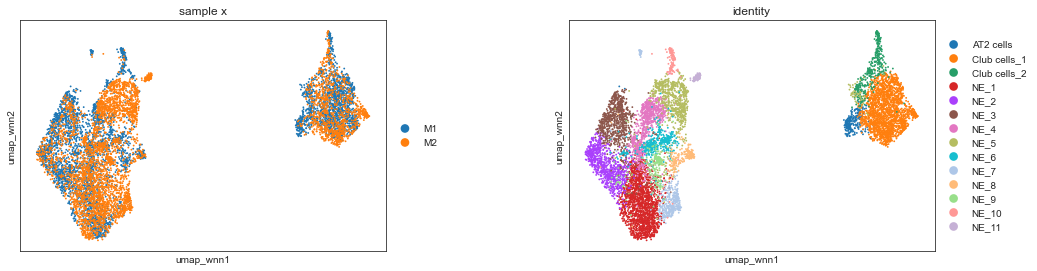

In [127]:
sc.pl.scatter(adata, basis = "umap_wnn", color = ['sample_x',"identity"])

In [128]:
adata.write_h5ad('../../data/combined/adata_01_filtered.h5ad')

Note: It seems some cells in the non-NE cluster are alabeled as NE_5.

In [129]:
adata

AnnData object with n_obs × n_vars = 8908 × 16719
    obs: 'dropkick_score', 'dropkick_label', 'arcsinh_n_genes_by_counts', 'sample_x', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ambient', 'log1p_total_counts_ambient', 'pct_counts_ambient', 'arcsinh_total_counts', 'S_score', 'G2M_score', 'phase', 'brcd', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'barcode', 'sample_y', 'ATAC_snn_res.0.5', 'seurat_clusters', 'nCount_peaks', 'nFeature_peaks', 'peaks_snn_res.0.5', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.5', 'SCT.weight', 'peaks.weight', 'nCount_Imputed_counts', 'nFeature_Imputed_counts', 'nCount_gene_activity', 'nFeature_gene_activity', 'NE_score1', 'identity', 'non.NE_s